# Preprocessing datasets
---

We get the datasets from the [Machine Learning Dataset 1](https://zenodo.org/record/5801834#.Y3MAC3ZBy8U)  [Machine Learning Dataset 2](https://zenodo.org/record/4628934#.Y3MA6HZBy8U). This is a series of information about poultry disease diagnostics was annotated using Polymerase Chain Reaction (PCR) and the farm-labeled fecal image.The poultry fecal images were taken in Arusha and Kilimanjaro regions in Tanzania between September 2020 and February 2021.
![Datasets](../picture/dataset.png)

The typical normal fecal material which is the ‘healthy’ class and Coccidiosis disease, the ‘cocci’ class were taken from poultry farms. The chickens were inoculated for Salmonella disease and fecal images taken from the diseased chickens for the ‘salmo’ class after one week. The chickens were also inoculated for Newcastle disease and fecal images for the 'ncd' class were taken within three days.

---

In [13]:
# Imports 
# open folder
from os import makedirs
from os import listdir
import os
from shutil import copyfile

# open image
import cv2
from PIL import Image

# random 
from random import seed
from random import random

# basic
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# image augmentation
import albumentations as A

## 01.Make Dataset_train_valid_test
---
Because it is necessary to divide the data into the respective directories in order to support images for Artificial Neural Network learning using Keras and Tensorflow tools:
![pre-precessiong](../picture/pre-precessiong.png)

**Train subdirectory** is data to use for neural network learning to find optimal weight and make architecture.

**Validation subdirectory** is data to make sure the neural network model is not overfitting with training datasets.

**Testing subdirectory** is data to make final capability with our model

In [2]:
# create diretories 
# train test validate
dataset_home = 'dataset_train_valid_test/' # name of diretories
subdirs = ['train/', 'valid/','test/'] # sub diretories
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['cocci/', 'healthy/','ncd/', 'salmo']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)

In [3]:
# seed random number generator
seed(42)

# define ratio of pictures to divide 
# train:80/test:10/valid:10 
val_ratio_1 = 0.2 # divide 80/20 of all data 
val_ratio_2 = 0.5 # divide 50/50 of divided 20% all data

In [4]:
# you can `download dataset form https://doi.org/10.5281/zenodo.5801834, https://doi.org/10.5281/zenodo.4628934`
# and bring all together in a folder 
# you must rename image data for pcr dataset such as pcrcocci.1.jpg to cocci.x.jpg
# (x follow by after order from farmmer-labeled dataset)
src_directory = 'all' # path diretories have all data

# random data form all diretories to of each subdirectories
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    
    # train valid test split
    if random() < val_ratio_1: # 80/20
        if random() < val_ratio_2: # 50/50 
            dst_dir = 'test/'
        else :
            dst_dir = 'valid/'
            
    # copyimages into subdirectories
    if file.startswith('cocci'):
        dst = dataset_home + dst_dir + 'cocci/'+ file
        copyfile(src, dst)
    elif file.startswith('healthy'):
        dst = dataset_home + dst_dir + 'healthy/' + file
        copyfile(src, dst)
    elif file.startswith('ncd'):
        dst = dataset_home + dst_dir + 'ncd/' + file
        copyfile(src, dst)
    elif file.startswith('salmo'):
        dst = dataset_home + dst_dir + 'salmo/' + file
        copyfile(src, dst)

In [5]:
# Recheck
# cocci in train
train_cocci = len(listdir('dataset_train_valid_test/train/cocci/'))
# cocci in test
test_cocci = len(listdir('dataset_train_valid_test/test/cocci/'))
# cocci in valid
valid_cocci = len(listdir('dataset_train_valid_test/valid/cocci/'))

In [6]:
# Show percent of each subdirectories in cocci class
print(f"train : {round(train_cocci/(train_cocci+test_cocci+valid_cocci),3)}")
print(f"test : {round(test_cocci/(train_cocci+test_cocci+valid_cocci),3)}")
print(f"validate : {round(valid_cocci/(train_cocci+test_cocci+valid_cocci),3)}")

train : 0.807
test : 0.094
validate : 0.1


---

## 02. Image augmentation
---

In [2]:
# check number of each group in train subdirectories
train_cocci = len(listdir('dataset_train_valid_test/train/cocci/'))
train_ncd = len(listdir('dataset_train_valid_test/train/ncd/'))
train_healthy = len(listdir('dataset_train_valid_test/train/healthy/'))
train_salmo = len(listdir('dataset_train_valid_test/train/salmo/'))

In [3]:
# imbalance class in ncd just have 450 image
print(f"Train dataset cocci class : {train_cocci}")
print(f"Train dataset ncd class : {train_ncd}")
print(f"Train dataset healthy class : {train_healthy}")
print(f"Train dataset salmo class : {train_salmo}")

Train dataset cocci class : 1997
Train dataset ncd class : 450
Train dataset healthy class : 1903
Train dataset salmo class : 2096


In [24]:
# use technique image augmentation for increase image data in class ncd
# for help imbalance class problem

# image augmentation flip horizontal(mirror) image 
transform_flip = A.Compose([A.HorizontalFlip(always_apply=True)])

# image augmentation rotation image 45 degree angle, rescale 10% and shift 0.062%
transform_shift = A.Compose([A.ShiftScaleRotate(shift_limit=(0.0625, 0.0625), 
                                                scale_limit=(0.1, 0.1), 
                                                rotate_limit=(45, 45),
                                                p=1.0)])

# image augmentation add gaussian noise and decrease brightness
transform_noise = A.Compose([A.GaussNoise(var_limit=(100,200),
                                         mean=-30,
                                         p=1.0)])

# soure code and example
# https://github.com/albumentations-team/albumentations#pixel-level-transforms
# https://tugot17.github.io/data-science-blog/albumentations/data-augmentation/tutorial/2020/09/20/Pixel-level-transforms-using-albumentations-package.html

In [25]:
# open sample image data
image = cv2.imread("./dataset_train_valid_test/train/ncd/ncd.13.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to pixel numpy array

# transform filp and shift
transformed_flip = transform_flip(image=image)['image']
transformed_shift = transform_shift(image=image)['image']
transformed_noise = transform_noise(image=image)['image']

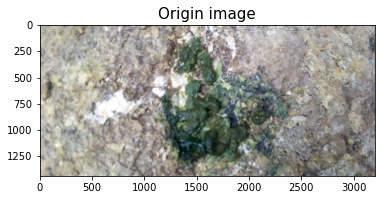

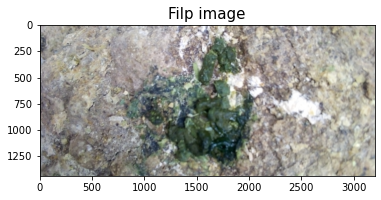

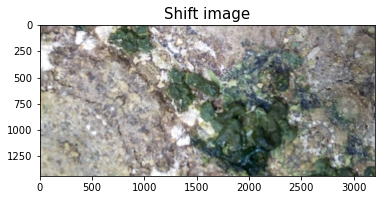

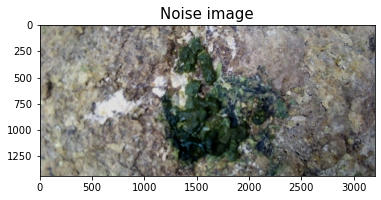

In [27]:
# Show origin and transform image
plt.imshow(image)
plt.title("Origin image", size=15)
plt.show()
plt.imshow(transformed_flip)
plt.title("Filp image", size=15)
plt.show()
plt.imshow(transformed_shift)
plt.title("Shift image", size=15)
plt.show()
plt.imshow(transformed_noise)
plt.title("Noise image", size=15)
plt.show()

In [32]:
# loop for use augmentation of each image in train directory class ncd
src_directory = "dataset_train_valid_test/train/ncd/"

for file in listdir(src_directory):
    image = cv2.imread(src_directory + file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # transform and save new flie
    transformed_flip = transform_flip(image=image)['image']
    cv2.imwrite(src_directory + file[:-4] + "flip.jpg", cv2.cvtColor(transformed_flip, cv2.COLOR_RGB2BGR))
    
    transformed_shift = transform_shift(image=image)['image']
    cv2.imwrite(src_directory + file[:-4] + "ship.jpg", cv2.cvtColor(transformed_shift, cv2.COLOR_RGB2BGR))
    
    transformed_noise = transform_noise(image=image)['image']
    cv2.imwrite(src_directory + file[:-4] + "noise.jpg", cv2.cvtColor(transformed_noise, cv2.COLOR_RGB2BGR))

In [33]:
# recheck
# we have image ncd class 1800 image 
train_ncd = len(listdir('dataset_train_valid_test/train/ncd/'))
print(f"Train dataset cocci class : {train_cocci}")
print(f"Train dataset ncd class : {train_ncd}")
print(f"Train dataset healthy class : {train_healthy}")
print(f"Train dataset salmo class : {train_salmo}")

Train dataset cocci class : 1997
Train dataset ncd class : 1800
Train dataset healthy class : 1903
Train dataset salmo class : 2096


---